In [57]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
import seaborn as sns

In [7]:
df = pd.read_csv(r"C:\Users\saikr\Downloads\movies.csv")

In [10]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [24]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [18]:
df.shape

(7668, 15)

In [26]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [70]:
#To calculate the empty rows in each column
df.isnull().sum()   

name               0
rating            77
genre              0
year               0
released           2
score              3
votes              3
director           0
writer             3
star               1
country            3
budget          2171
gross            189
company           17
runtime            4
updated_year       0
dtype: int64

In [76]:
# To drop the empty rows from the data frame
df = df.dropna()  
df.shape

(5421, 16)

In [79]:
# To check for duplicate values and dropping them
df.drop_duplicates()
df.shape

(5421, 16)

In [80]:
# Statistical analysis for each column
df.describe()

,year,score,votes,budget,gross,runtime
count,5421.000000,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,2001.661317,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739
std,10.540908,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


In [150]:
# To calculate the average gross revenue for each genre
df.groupby(['genre'])['gross'].mean().sort_values(ascending = False)

# 'Family' genre has more average gross revenue compared to others

genre
Family       5.185831e+08
Animation    2.811044e+08
Action       1.680232e+08
Adventure    1.332682e+08
Mystery      1.178877e+08
Biography    6.139527e+07
Drama        6.036914e+07
Comedy       5.916766e+07
Horror       5.681695e+07
Crime        5.016958e+07
Thriller     4.248814e+07
Fantasy      3.987870e+07
Sci-Fi       3.761010e+07
Romance      3.357538e+07
Western      1.001294e+07
Name: gross, dtype: float64

<AxesSubplot:title={'center':'No.of movies released yearwise'}, xlabel='Year', ylabel='Movies Released'>

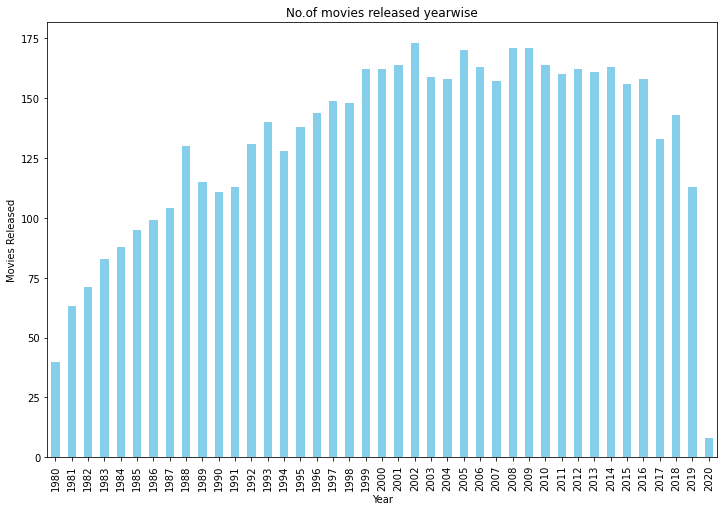

In [176]:
# To understand the yearwise movies release trend from 1980 to 2020.
df.groupby(['year'])['name'].count().plot(kind = 'bar', color = "skyblue", xlabel = "Year", ylabel = "Movies Released", title = "No.of movies released yearwise")

Text(0, 0.5, 'Gross Revenue')

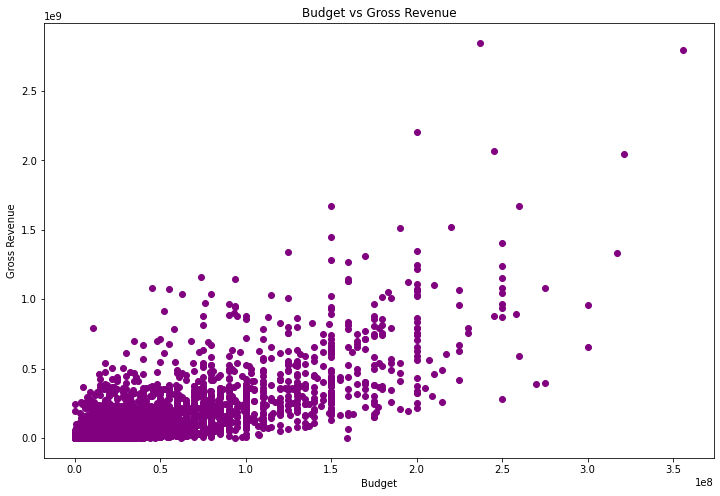

In [92]:
# To visualize the relation between budget spent and gross revenue collected by each movie
plt.scatter(x= df['budget'], y = df['gross'], color="purple")
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')

Text(0, 0.5, 'Gross Revenue')

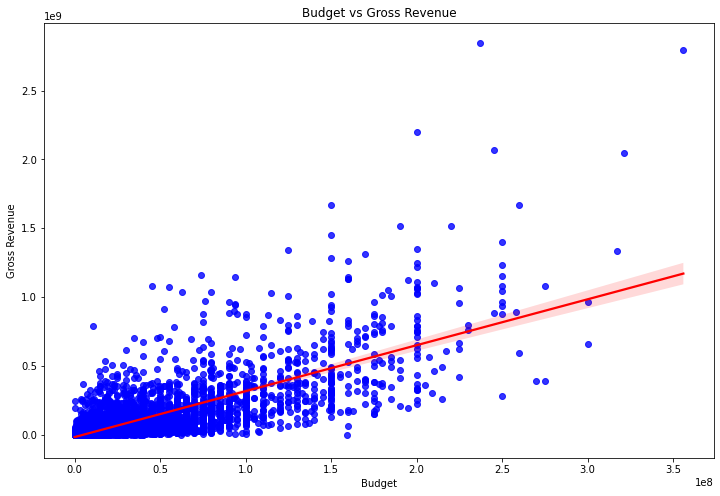

In [94]:
# To understand the trend between budget spent and the gross revenue per each movie.
sns.regplot(x = 'budget',y = 'gross', data = df, scatter_kws = {"color":"blue"}, line_kws = {"color":"red"})
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')

# Overall, there is a positive relation between budget and the gross revenue

Text(0, 0.5, 'Gross Revenue')

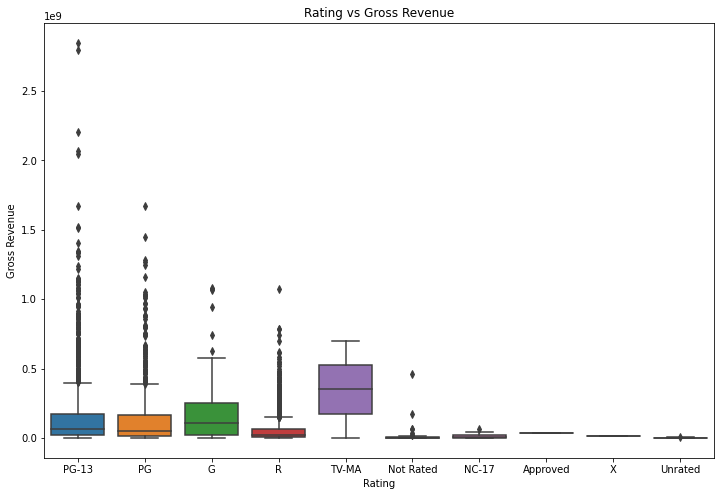

In [108]:
# To understand the relation between movie rating and gross revenue grouped by rating category
sns.boxplot(x = 'rating',y = 'gross', data = df)
plt.title('Rating vs Gross Revenue')
plt.xlabel('Rating')
plt.ylabel('Gross Revenue')

# Since, most of the ratings' mean and median are at the zero level, we can assume that there is no relation between rating and gross revenue.

In [116]:
# To get the pearson correlation coefficients among all the numeric variables in the data set
df.corr(method = "pearson")

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


Text(87.0, 0.5, 'Movies Features')

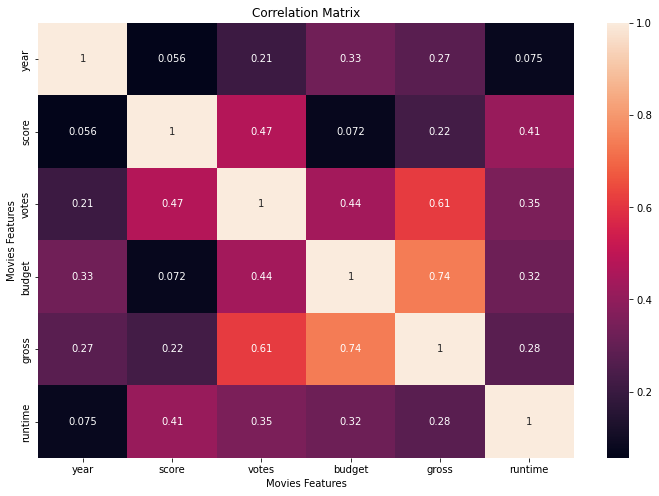

In [177]:
sns.heatmap(df.corr(method = "pearson"), annot = True)
plt.title('Correlation Matrix')
plt.xlabel('Movies Features')
plt.ylabel('Movies Features')

In [ ]:
############################ OBSERVATIONS ################################
# There is a positive correlation between budget spent and gross collected by the movies. (Corr. Coeff = 0.74)
# 'Family' genre has collected the highest average gross revenue so far compared to other genres.
# Movie rating has no effect on the gross collected by that movie.